10

In [3]:
import numpy as np
import pandas as pd
import os
import sys
import random
pd.set_option('display.max_columns', None)

In [20]:
data = pd.read_csv(r"E:\github\fanap\melb_data.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,3016.0,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,3085.0,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [25]:
data[["Address"]]

,Address
0,85 Turner St
1,25 Bloomburg St
2,5 Charles St
3,40 Federation La
4,55a Park St
...,...
18391,8/2 Thompson St
18392,96 Verdon St
18393,17 Amaroo Wy
18394,6 Agnes St


In [28]:
data.groupby("Type")["Price"].mean()

Type
h    1.234251e+06
t    9.240601e+05
u    6.187154e+05
Name: Price, dtype: float64

In [29]:
data.groupby("Type")["Price"].aggregate(lambda x: x.sum()/len(x))

Type
h    1.234251e+06
t    9.240601e+05
u    6.187154e+05
Name: Price, dtype: float64

In [60]:
df = pd.read_csv(r"E:\github\fanap\learn\bank-additional-full.csv", sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [61]:
df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [62]:
df["marital"].value_counts(normalize=True)

marital
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: proportion, dtype: float64

In [63]:
df.sort_values(["age","duration"], ascending=True).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,432,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,498,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,896,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes


In [64]:
df.apply(np.max)

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate            1.4
cons.price.idx       94.767
cons.conf.idx         -26.9
euribor3m             5.045
nr.employed          5228.1
y                       yes
dtype: object

In [65]:
df[["age","duration"]].apply(lambda x: x[x<30])

,age,duration
8,24.0,NaN
9,25.0,NaN
11,25.0,NaN
12,29.0,NaN
45,NaN,22.0
...,...,...
41143,29.0,NaN
41145,26.0,NaN
41147,25.0,NaN
41152,26.0,NaN


In [66]:
df[((df["age"] < 50) & (df["duration"] < 50))]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20,30,unemployed,married,high.school,no,no,no,telephone,may,mon,38,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
45,42,technician,single,professional.course,unknown,no,no,telephone,may,mon,22,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
84,38,technician,single,university.degree,no,no,yes,telephone,may,mon,20,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
105,43,services,single,high.school,unknown,no,no,telephone,may,mon,21,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
162,40,blue-collar,married,basic.9y,unknown,no,no,telephone,may,mon,46,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40967,34,student,single,professional.course,no,yes,no,telephone,oct,fri,6,1,999,0,nonexistent,-1.1,94.601,-49.5,0.993,4963.6,no
40997,25,student,married,high.school,no,yes,no,telephone,oct,wed,7,1,999,0,nonexistent,-1.1,94.601,-49.5,1.016,4963.6,no
40998,34,technician,married,university.degree,no,yes,no,telephone,oct,wed,5,1,999,0,nonexistent,-1.1,94.601,-49.5,1.016,4963.6,no
41048,25,student,single,high.school,no,yes,no,telephone,oct,tue,17,1,999,0,nonexistent,-1.1,94.601,-49.5,1.037,4963.6,no


In [67]:
d = {"no":0, "yes":1}
df["y"] = df["y"].map(d)
df["y"]

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [68]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


In [72]:
df.pivot_table(
    ["age", "duration"],
    ["job"], aggfunc = "mean").head(10)

,age,duration
job,,
admin.,38.187296,254.312128
blue-collar,39.555760,264.542360
entrepreneur,41.723214,263.267857
housemaid,45.500000,250.454717
management,42.362859,257.058140
retired,62.027326,273.712209
self-employed,39.949331,264.142153
services,37.926430,258.398085
student,25.894857,283.683429


In [77]:
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = ["mean", "count"],
)

mean            count         
                           age  campaign    age campaign
education                                               
basic.4y             47.596504  2.600575   4176     4176
basic.6y             40.448953  2.556283   2292     2292
basic.9y             39.061208  2.532341   6045     6045
high.school          37.998213  2.568576   9515     9515
illiterate           48.500000  2.277778     18       18
professional.course  40.080107  2.586115   5243     5243
university.degree    38.879191  2.563527  12168    12168
unknown              43.481225  2.596187   1731     1731

In [4]:
data = pd.read_csv(r"E:\github\fanap\flights.csv")
data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [5]:
#میانگین یا گشتاور اول
data["arr_delay"].mean()

6.89537675731489

In [6]:
from scipy import stats
stats.trim_mean(data["arr_delay"], 0.1)

0.9612355338465307

In [83]:
data['arr_delay'].median()

-5.0

In [89]:
# واریانس یا گشتاور دوم
# به داده های نویز حساس است
data['arr_delay'].var()

1992.13072710194

In [90]:
# چولگی یا گشتاور سوم
data['arr_delay'].skew()

3.7168174804571863

In [91]:
# کورتسیس یا گشتاور چهارم
data['arr_delay'].kurtosis()


29.233043998766775

In [93]:
# uni variable analysis  یعنی روی یک متغیر گشتاور های اماری رو اعمال میکنیم
# bi variable ==> corr(pearson correlation)  زیر 5 درصد باشه درنظر نمیگیریم یعنی کورلیشن 0 در نظر میگیریم



امار تفسیری  
minimum sample size 

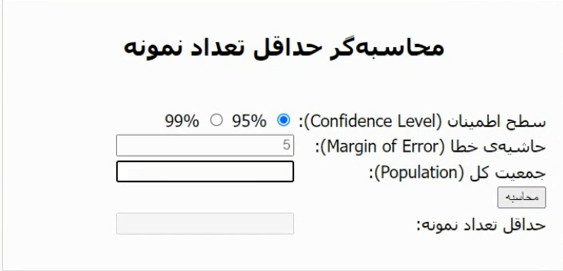




AB TEST

A: test  
B: control

<div dir="rtl">
اگه بین a و b اختلاف بود باید چند بار دیگه تکرار کنیم.
اگر در بیشتر مواقع A بیشتر (یاکمتر) از B بود میشه گفت نتیجه ازمایش درست است. (ولی عملا این کار شدنی نیست)   

AB تست اماری یا شبیه سازی تکرار:


</div>